# Part1: Data Merging

In [1]:
import pandas as pd
import re

In [2]:
# 读取大厂二手房数据
try:
    dachang_df = pd.read_csv('大厂二手房数据.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dachang_df = pd.read_csv('大厂二手房数据.csv', encoding='gbk')
    except:
        dachang_df = pd.read_csv('大厂二手房数据.csv', encoding='gb18030')
# 统一列名并处理数据
dachang_df = dachang_df.rename(columns={'Tota': 'TotalPrice'})
# 提取单价中的纯数字
dachang_df['PricePerSqm'] = dachang_df['PricePerSqm'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 添加Location列
dachang_df['Location'] = '大厂'

In [3]:
# 读取燕郊二手房数据
yanjiao_df = pd.read_csv('燕郊二手房数据.csv')
# 统一列名
yanjiao_df = yanjiao_df.rename(columns={
    '标题': 'HouseName',
    '面积': 'Area',
    '总价': 'TotalPrice',
    '单价': 'PricePerSqm'
})
# 处理面积（去掉m²）
yanjiao_df['Area'] = yanjiao_df['Area'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 处理总价（去掉"万"）
yanjiao_df['TotalPrice'] = yanjiao_df['TotalPrice'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 处理单价（去掉"元/m²"）
yanjiao_df['PricePerSqm'] = yanjiao_df['PricePerSqm'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 设置位置为燕郊
yanjiao_df['Location'] = '燕郊'

In [4]:
# 读取马驹桥二手房数据
majuqiao_df = pd.read_csv('马驹桥二手房数据.csv')
# 统一列名
majuqiao_df = majuqiao_df.rename(columns={
    '标题': 'HouseName',
    '面积': 'Area',
    '总价': 'TotalPrice',
    '单价': 'PricePerSqm'
})
# 处理面积（去掉m²）
majuqiao_df['Area'] = majuqiao_df['Area'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 总价已经是纯数字，无需处理
# 处理单价（去掉"元/m²"）
majuqiao_df['PricePerSqm'] = majuqiao_df['PricePerSqm'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 设置位置为马驹桥
majuqiao_df['Location'] = '马驹桥'

In [5]:
# 选择需要的列
dachang_selected = dachang_df[['HouseName', 'TotalPrice', 'Area', 'PricePerSqm', 'Location']]
yanjiao_selected = yanjiao_df[['HouseName', 'TotalPrice', 'Area', 'PricePerSqm', 'Location']]
majuqiao_selected = majuqiao_df[['HouseName', 'TotalPrice', 'Area', 'PricePerSqm', 'Location']]

# 合并二手房数据
ershoufang_df = pd.concat([dachang_selected, yanjiao_selected, majuqiao_selected], ignore_index=True)

# 保存合并后的二手房数据
ershoufang_df.to_csv('河北-廊坊 + 北京-通州二手房数据.csv', index=False)
print(f"二手房数据处理完成，共 {len(ershoufang_df)} 条记录")

二手房数据处理完成，共 1615 条记录


In [6]:
# 读取大厂租房数据（尝试不同编码）
try:
    dachang_zufang_df = pd.read_csv('大厂租房数据.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dachang_zufang_df = pd.read_csv('大厂租房数据.csv', encoding='gbk')
    except:
        dachang_zufang_df = pd.read_csv('大厂租房数据.csv', encoding='gb18030')
# MonthlyRent和Area已经是纯数字，无需处理
# 添加Location列
dachang_zufang_df['Location'] = '大厂'

In [7]:
# 读取燕郊租房数据
yanjiao_zufang_df = pd.read_csv('燕郊租房数据.csv')
# 统一列名
yanjiao_zufang_df = yanjiao_zufang_df.rename(columns={
    '标题': 'HouseName',
    '面积': 'Area',
    '价格': 'MonthlyRent'
})
# 处理面积（去掉m²）
yanjiao_zufang_df['Area'] = yanjiao_zufang_df['Area'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 处理月租金（去掉"元/月"）
yanjiao_zufang_df['MonthlyRent'] = yanjiao_zufang_df['MonthlyRent'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 设置位置为燕郊
yanjiao_zufang_df['Location'] = '燕郊'

In [8]:
# 读取马驹桥租房数据
majuqiao_zufang_df = pd.read_csv('马驹桥租房数据.csv')
# 统一列名
majuqiao_zufang_df = majuqiao_zufang_df.rename(columns={
    '标题': 'HouseName',
    '面积': 'Area',
    '价格': 'MonthlyRent'
})
# 处理面积（去掉m²）
majuqiao_zufang_df['Area'] = majuqiao_zufang_df['Area'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if pd.notna(x) else None)
# 月租金已经是纯数字，无需处理
# 设置位置为马驹桥
majuqiao_zufang_df['Location'] = '马驹桥'

In [9]:
# 选择需要的列
dachang_zufang_selected = dachang_zufang_df[['HouseName', 'MonthlyRent', 'Area', 'Location']]
yanjiao_zufang_selected = yanjiao_zufang_df[['HouseName', 'MonthlyRent', 'Area', 'Location']]
majuqiao_zufang_selected = majuqiao_zufang_df[['HouseName', 'MonthlyRent', 'Area', 'Location']]

# 合并租房数据
zufang_df = pd.concat([dachang_zufang_selected, yanjiao_zufang_selected, majuqiao_zufang_selected], ignore_index=True)

#计算每平方米的租金
zufang_df['RentPerSqm'] = zufang_df['MonthlyRent'] / zufang_df['Area']

# 保存合并后的租房数据
zufang_df.to_csv('河北-廊坊 + 北京-通州租房数据.csv', index=False)
print(f"租房数据处理完成，共 {len(zufang_df)} 条记录")

租房数据处理完成，共 846 条记录


# Part2: Outlier Checking

In [10]:
# 清理数据，移除所有缺失值
ershoufang_df = ershoufang_df.dropna()
zufang_df = zufang_df.dropna()

In [11]:
# 二手房数据描述
print("二手房数据基本统计描述：")
print(ershoufang_df.describe())

二手房数据基本统计描述：
         TotalPrice         Area    PricePerSqm
count   1615.000000  1615.000000    1615.000000
mean     207.338341    90.638885   19007.752322
std      377.966921    44.400575   12688.198042
min       15.000000     2.000000    4112.000000
25%       68.000000    75.000000    8696.500000
50%      120.000000    88.000000   11992.000000
75%      280.000000   100.500000   29987.500000
max    11500.000000  1016.000000  113163.000000


In [12]:
# 检测二手房数据异常值
print("\n二手房每平米价格异常值检测：")
Q1_price_per_sqm = ershoufang_df['PricePerSqm'].quantile(0.25)
Q3_price_per_sqm = ershoufang_df['PricePerSqm'].quantile(0.75)
IQR_price_per_sqm = Q3_price_per_sqm - Q1_price_per_sqm
lower_bound_price_per_sqm = Q1_price_per_sqm - 1.5 * IQR_price_per_sqm
upper_bound_price_per_sqm = Q3_price_per_sqm + 1.5 * IQR_price_per_sqm
outliers_price_per_sqm = ershoufang_df[(ershoufang_df['PricePerSqm'] < lower_bound_price_per_sqm) | 
                                     (ershoufang_df['PricePerSqm'] > upper_bound_price_per_sqm)]
print(f"每平米价格异常值数量: {len(outliers_price_per_sqm)}")
print(f"每平米价格异常值占比: {len(outliers_price_per_sqm) / len(ershoufang_df) * 100:.2f}%")


二手房每平米价格异常值检测：
每平米价格异常值数量: 7
每平米价格异常值占比: 0.43%


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Location')

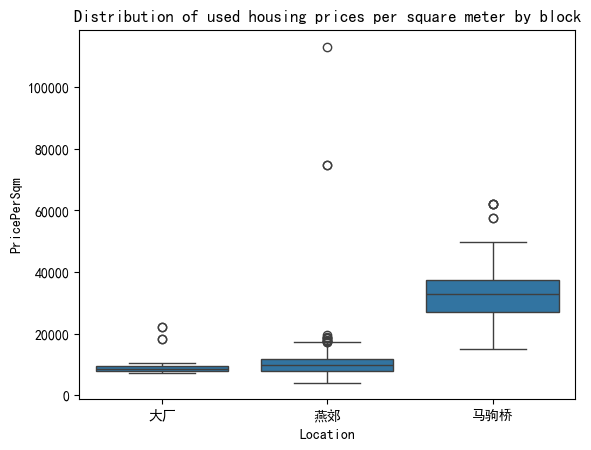

In [14]:
# 各街区二手房每平米价格箱线图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
sns.boxplot(x='Location', y='PricePerSqm', data=ershoufang_df)
plt.title('Distribution of used housing prices per square meter by block')
plt.ylabel('PricePerSqm')
plt.xlabel('Location')

In [15]:
# 租房数据描述
print("\n租房数据基本统计描述：")
print(zufang_df.describe())


租房数据基本统计描述：
       MonthlyRent         Area  RentPerSqm
count   830.000000   830.000000  830.000000
mean   1985.034940    93.839759   23.864932
std     997.561634   114.546864   10.917383
min     300.000000    15.000000    1.000000
25%    1400.000000    75.000000   17.808219
50%    1700.000000    86.000000   20.938089
75%    2200.000000    93.000000   25.902778
max    9000.000000  1900.000000  100.000000


In [16]:
# 检测租房数据异常值
print("\n每平米月租金异常值检测：")
Q1_rent_per_sqm = zufang_df['RentPerSqm'].quantile(0.25)
Q3_rent_per_sqm = zufang_df['RentPerSqm'].quantile(0.75)
IQR_rent_per_sqm = Q3_rent_per_sqm - Q1_rent_per_sqm
lower_bound_rent_per_sqm = Q1_rent_per_sqm - 1.5 * IQR_rent_per_sqm
upper_bound_rent_per_sqm = Q3_rent_per_sqm + 1.5 * IQR_rent_per_sqm
outliers_rent_per_sqm = zufang_df[(zufang_df['RentPerSqm'] < lower_bound_rent_per_sqm) | 
                         (zufang_df['RentPerSqm'] > upper_bound_rent_per_sqm)]
print(f"每平米月租金异常值数量: {len(outliers_rent_per_sqm)}")
print(f"每平米月租金异常值占比: {len(outliers_rent_per_sqm) / len(zufang_df) * 100:.2f}%")


每平米月租金异常值检测：
每平米月租金异常值数量: 80
每平米月租金异常值占比: 9.64%


Text(0.5, 0, 'Location')

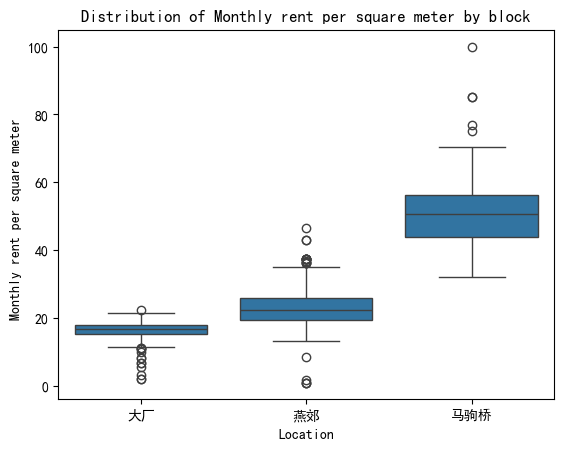

In [17]:
# 各街区每平米月租金箱线图
sns.boxplot(x='Location', y='RentPerSqm', data=zufang_df)
plt.title('Distribution of Monthly rent per square meter by block')
plt.ylabel('Monthly rent per square meter ')
plt.xlabel('Location')

综上所述，异常值存在。
在第三部分的分析中，我们使用中位数而非均值来计算房价租金比，可以减少异常值的影响。
在第四部分的分析中，异常值可能会对残差平方和产生较大影响，从而导致模型拟合效果不佳。然而，经检查，这些异常值反映了数据的真实特性（如某些高端别墅的超高房价），包含了有价值的信息，直接删除可能会导致信息损失。因此，我们保留了这些异常值。

# Part3: Calculation & Visualization

In [18]:
# 各街区二手房的每平米价格
price_per_sqm = ershoufang_df.groupby('Location')['PricePerSqm']
# 各街区的房屋每平米月租金
rent_per_sqm = zufang_df.groupby('Location')['RentPerSqm']

In [19]:
# 计算各街区的房价租金比
# 房价租金比 = 房价 / 月租金  = 每平米房价 / 每平米月租金 

# 计算各区域房价中位数
price_median = ershoufang_df.groupby('Location')['PricePerSqm'].median()
# 计算各区域租金中位数
rent_median = zufang_df.groupby('Location')['RentPerSqm'].median()

# 计算房价租金比
price_rent_ratio = {}
for location in price_median.index:
    if location in rent_median.index:
        price_rent_ratio[location] = price_median[location] / rent_median[location] 

# 转换为DataFrame
price_rent_ratio_df = pd.DataFrame(list(price_rent_ratio.items()), columns=['Location', 'PriceRentRatio'])

# 打印各区域房价租金比
print("各区域房价租金比（Price-to-Rent Ratio）：")
print(price_rent_ratio_df)

# 输出结论
for location, ratio in price_rent_ratio.items():
    if ratio < 200:
        evaluation = "低于全球公平值，可能房价被低估或租金较高"
    elif ratio > 200:
        evaluation = "高于全球公平值，可能房价被高估或租金较低"
    else:
        evaluation = "接近全球公平值，相对合理"
    
    print(f"{location}区域的房价租金比为{ratio:.2f}，{evaluation}")

各区域房价租金比（Price-to-Rent Ratio）：
  Location  PriceRentRatio
0       大厂      498.934000
1       燕郊      439.797273
2      马驹桥      650.817444
大厂区域的房价租金比为498.93，高于全球公平值，可能房价被高估或租金较低
燕郊区域的房价租金比为439.80，高于全球公平值，可能房价被高估或租金较低
马驹桥区域的房价租金比为650.82，高于全球公平值，可能房价被高估或租金较低


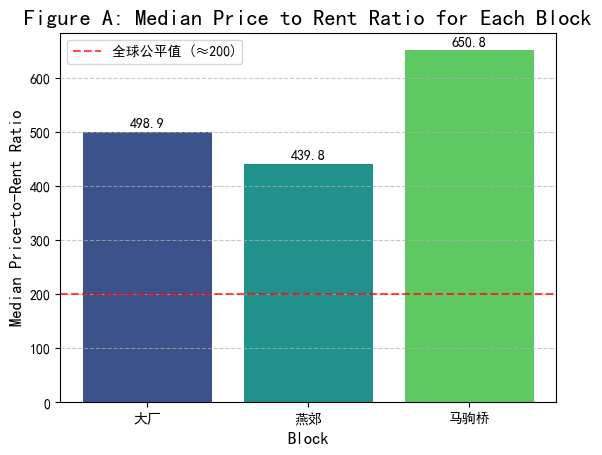

In [20]:
# 绘制各区域房价租金比柱状图
bars = plt.bar(price_rent_ratio_df['Location'], price_rent_ratio_df['PriceRentRatio'], 
               color=sns.color_palette('viridis', len(price_rent_ratio_df)))

# 添加全球公平值参考线
plt.axhline(y=200, color='r', linestyle='--', alpha=0.7, label='全球公平值 (≈200)')

# 在柱子上标注具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom')

# 设置图表标题和轴标签
plt.title('Figure A: Median Price to Rent Ratio for Each Block', fontsize=16)
plt.xlabel('Block', fontsize=12)
plt.ylabel('Median Price-to-Rent Ratio', fontsize=12)
plt.legend()

#显示图表
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part4: Regression & Prediction

In [21]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# Model 1: price/m2i = β0m2i + β2locationi + β2m2i × locationi + ϵi
# 创建虚拟变量
ershoufang_df_reg = pd.get_dummies(ershoufang_df, columns=['Location'], drop_first=True)

# 添加交互项
for col in [col for col in ershoufang_df_reg.columns if col.startswith('Location_')]:
    ershoufang_df_reg[f'Area_{col}'] = ershoufang_df_reg['Area'] * ershoufang_df_reg[col]

# 构建Model 1
X_price = ershoufang_df_reg[['Area'] + 
                     [col for col in ershoufang_df_reg.columns if col.startswith('Location_')] + 
                     [col for col in ershoufang_df_reg.columns if col.startswith('Area_Location_')]]
X_price = sm.add_constant(X_price)
y_price = ershoufang_df_reg['PricePerSqm']

X_price = X_price.astype(float)
y_price = y_price.astype(float)

model1 = sm.OLS(y_price, X_price).fit()
print("Model 1 回归结果:")
print(model1.summary())

Model 1 回归结果:
                            OLS Regression Results                            
Dep. Variable:            PricePerSqm   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1683.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:43:43   Log-Likelihood:                -16073.
No. Observations:                1615   AIC:                         3.216e+04
Df Residuals:                    1609   BIC:                         3.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6923.

In [23]:
# Model 2: rent/m2i = β0m2i + β2locationi + β3m2i × locationi + ϵi
# 创建虚拟变量
zufang_df_reg = pd.get_dummies(zufang_df, columns=['Location'], drop_first=True)

# 添加交互项
for col in [col for col in zufang_df_reg.columns if col.startswith('Location_')]:
    zufang_df_reg[f'Area_{col}'] = zufang_df_reg['Area'] * zufang_df_reg[col]

# 构建Model 2
X_rent = zufang_df_reg[['Area'] + 
                [col for col in zufang_df_reg.columns if col.startswith('Location_')] + 
                [col for col in zufang_df_reg.columns if col.startswith('Area_Location_')]]
X_rent = sm.add_constant(X_rent)
y_rent = zufang_df_reg['RentPerSqm']

X_rent = X_rent.astype(float)
y_rent = y_rent.astype(float)

model2 = sm.OLS(y_rent, X_rent).fit()
print("\nModel 2 (租金/平方米) 回归结果:")
print(model2.summary())


Model 2 (租金/平方米) 回归结果:
                            OLS Regression Results                            
Dep. Variable:             RentPerSqm   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     624.6
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          2.28e-277
Time:                        21:43:43   Log-Likelihood:                -2511.1
No. Observations:                 830   AIC:                             5034.
Df Residuals:                     824   BIC:                             5063.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const         

In [26]:
# 保存模型
import pickle
import os

print("\n保存回归模型...")
with open('model1_price.pkl', 'wb') as f:
    pickle.dump(model1, f)
    
with open('model2_rent.pkl', 'wb') as f:
    pickle.dump(model2, f)

# 保存特征信息，用于后续预测
feature_info = {
    'price_model_features': model1.params.index.tolist(),
    'rent_model_features': model2.params.index.tolist(),
    'locations': ["大厂", "燕郊", "马驹桥"],
    'reference_location': "大厂"
}

with open('feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)
    
print("模型保存完成!")


保存回归模型...
模型保存完成!


In [27]:
print("\n加载模型并进行预测...")

# 清理变量模拟新会话
del model1, model2, feature_info

# 加载模型和特征信息
with open('model1_price.pkl', 'rb') as f:
    model1 = pickle.load(f)
    
with open('model2_rent.pkl', 'rb') as f:
    model2 = pickle.load(f)
    
with open('feature_info.pkl', 'rb') as f:
    feature_info = pickle.load(f)
    
# 提取特征信息    
price_model_features = feature_info['price_model_features']
rent_model_features = feature_info['rent_model_features']
locations = feature_info['locations']
reference_location = feature_info['reference_location']

print(f"加载成功! 房价模型特征: {len(price_model_features)}个, 租金模型特征: {len(rent_model_features)}个")
print(f"区域: {locations}")
print(f"参考区域: {reference_location}")



加载模型并进行预测...
加载成功! 房价模型特征: 6个, 租金模型特征: 6个
区域: ['大厂', '燕郊', '马驹桥']
参考区域: 大厂


In [28]:
# 创建一个预测函数，方便后续使用
def predict_price_rent_ratio(area, location):
    """根据房屋面积和区域预测房价租金比"""
    # 创建预测数据的特征矩阵
    pred_data = {'const': 1, 'Area': area}
    
    # 添加虚拟变量
    for loc in locations:
        if loc != reference_location:  
            dummy_var = f'Location_{loc}'  
            pred_data[dummy_var] = 1 if location == loc else 0
    
    # 添加交互项
    for loc in locations:
        if loc != reference_location:
            interaction_var = f'Area_Location_{loc}' 
            pred_data[interaction_var] = area * pred_data[f'Location_{loc}'] if f'Location_{loc}' in pred_data else 0
    
    # 转换为DataFrame
    price_pred_df = pd.DataFrame([pred_data])
    for col in price_model_features:
        if col not in price_pred_df.columns:
            price_pred_df[col] = 0
    price_pred_df = price_pred_df[price_model_features]
    
    rent_pred_df = pd.DataFrame([pred_data])
    for col in rent_model_features:
        if col not in rent_pred_df.columns:
            rent_pred_df[col] = 0
    rent_pred_df = rent_pred_df[rent_model_features]
    
    # 预测
    pred_price = model1.predict(price_pred_df).values[0]
    pred_rent = model2.predict(rent_pred_df).values[0]
    price_rent_ratio = pred_price / (pred_rent)
    
    return {
        'PredictedPricePerSqm': pred_price,
        'PredictedRentPerSqm': pred_rent,
        'PriceRentRatio': price_rent_ratio
    }

# 演示函数使用
print("\n使用函数进行单独预测:")
for area in [50, 100]:
    for location in locations:
        result = predict_price_rent_ratio(area, location)
        print(f"{location}区域{area}平米房屋 - 房价: {result['PredictedPricePerSqm']:.2f}元/平米, "
              f"租金: {result['PredictedRentPerSqm']:.2f}元/平米/月, "
              f"房价租金比: {result['PriceRentRatio']:.2f}")


使用函数进行单独预测:
大厂区域50平米房屋 - 房价: 7913.60元/平米, 租金: 17.19元/平米/月, 房价租金比: 460.46
燕郊区域50平米房屋 - 房价: 7299.63元/平米, 租金: 23.77元/平米/月, 房价租金比: 307.15
马驹桥区域50平米房屋 - 房价: 32247.65元/平米, 租金: 58.47元/平米/月, 房价租金比: 551.56
大厂区域100平米房屋 - 房价: 8903.26元/平米, 租金: 16.05元/平米/月, 房价租金比: 554.71
燕郊区域100平米房屋 - 房价: 11800.00元/平米, 租金: 23.01元/平米/月, 房价租金比: 512.93
马驹桥区域100平米房屋 - 房价: 32790.18元/平米, 租金: 49.48元/平米/月, 房价租金比: 662.73


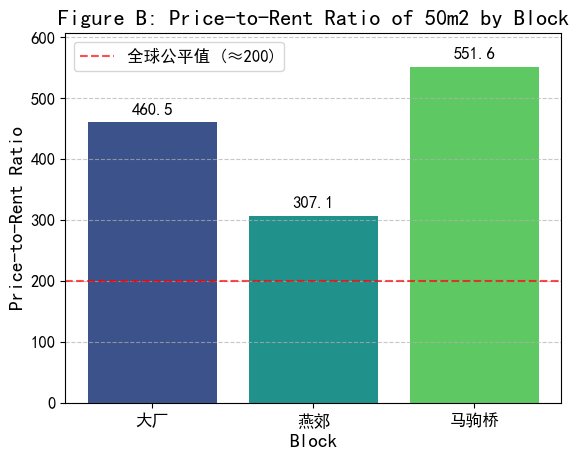

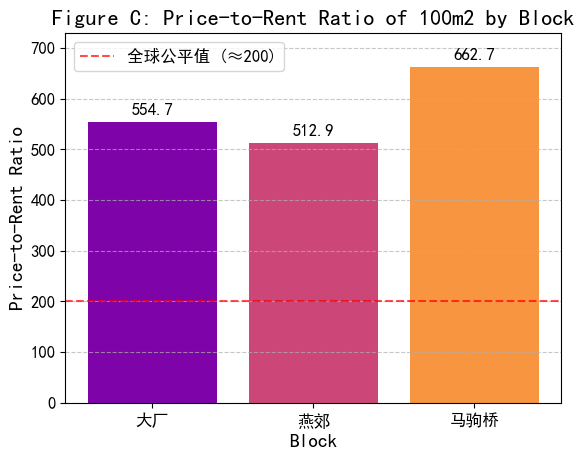

In [30]:
# 根据结果创建数据
data = {
    'Area': [50, 50, 50, 100, 100, 100],
    'Location': ['大厂', '燕郊', '马驹桥', '大厂', '燕郊', '马驹桥'],
    'PricePerSqm': [7913.60, 7299.63, 32247.65, 8903.26, 11800.00, 322790.18],
    'RentPerSqm': [17.19, 23.77, 58.47, 16.05, 23.01, 49.48],
    'PriceRentRatio': [460.46, 307.15, 551.56, 554.71, 512.93, 662.73]
}

predictions_df = pd.DataFrame(data)

# 生成Figure B: 50平米的房价租金比
fig_b_data = predictions_df[predictions_df['Area'] == 50]

bars = plt.bar(fig_b_data['Location'], fig_b_data['PriceRentRatio'], 
               color=sns.color_palette('viridis', len(fig_b_data)))

# 添加全球公平值参考线
plt.axhline(y=200, color='r', linestyle='--', alpha=0.7, label='全球公平值 (≈200)')

# 在柱子上标注具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:.1f}', ha='center', va='bottom', fontsize=12)
    
# 调整Y轴范围，确保数值标签可见
plt.ylim(0, max(fig_b_data['PriceRentRatio'])*1.1)

# 设置图表标题和轴标签
plt.title('Figure B: Price-to-Rent Ratio of 50m2 by Block', fontsize=16)
plt.xlabel('Block', fontsize=14)
plt.ylabel('Price-to-Rent Ratio', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# 生成Figure C: 100平米的房价租金比
fig_c_data = predictions_df[predictions_df['Area'] == 100]

bars = plt.bar(fig_c_data['Location'], fig_c_data['PriceRentRatio'], 
               color=sns.color_palette('plasma', len(fig_c_data)))

# 添加全球公平值参考线
plt.axhline(y=200, color='r', linestyle='--', alpha=0.7, label='全球公平值 (≈200)')

# 在柱子上标注具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:.1f}', ha='center', va='bottom', fontsize=12)

# 调整Y轴范围，确保数值标签可见
plt.ylim(0, max(fig_c_data['PriceRentRatio'])*1.1)

# 设置图表标题和轴标签
plt.title('Figure C: Price-to-Rent Ratio of 100m2 by Block', fontsize=16)
plt.xlabel('Block', fontsize=14)
plt.ylabel('Price-to-Rent Ratio', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()